### Example to explain PRC MCS

In [ ]:
pr = pred_rxns[paths[st_pair][min_mean_sorted_idxs[0]].rhashes[2]]
pr_sma = pr.smarts
kr_sma = pr.known_rxns[0][1]

In [1]:
from src.rxn_ctr_mcs import atom_map
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import SVG

am_pr_sma = atom_map(pr_sma)
am_kr_sma = atom_map(kr_sma)

pr_rxn = AllChem.ReactionFromSmarts(am_pr_sma, useSmiles=True)
kr_rxn = AllChem.ReactionFromSmarts(am_kr_sma, useSmiles=True)
pr_rxn.Initialize()
kr_rxn.Initialize()

pr_ra = pr_rxn.GetReactingAtoms()
kr_ra = kr_rxn.GetReactingAtoms()

/home/stef/miniconda3/envs/mine/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at /home/stef/miniconda3/envs/mine/lib/python3.7/site-packages/rxnmapper/models/transformers/albert_heads_8_uspto_all_1310k were not used when initializing AlbertModel: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expec

NameError: name 'pr_sma' is not defined

In [ ]:
fn, _ = draw_rxn_svg(pr_sma, rhash='example_pred_rxn_ctr', hilite_atoms=[[0, 1, 2]])

with open(fn, 'r') as f:
    img = f.read()

SVG(img)

In [ ]:
fn, _ = draw_rxn_svg(pr_sma, rhash='example_pred_mcs', hilite_atoms=[[0, 1, 2, 3, 4, 5]])

with open(fn, 'r') as f:
    img = f.read()

SVG(img)

In [ ]:
fn, _ = draw_rxn_svg(kr_sma, rhash='example_known_rxn_ctr', hilite_atoms=[[0, 1, 2]])

with open(fn, 'r') as f:
    img = f.read()

SVG(img)

In [ ]:
fn, _ = draw_rxn_svg(kr_sma, rhash='example_known_mcs', hilite_atoms=[[0, 1, 2, 8, 9, 10]])

with open(fn, 'r') as f:
    img = f.read()

SVG(img)

In [ ]:
mol = kr_rxn.GetReactantTemplate(0)
Chem.SanitizeMol(mol)
hilite_atoms = list(kr_ra[0])
colors = {elt : (0, 0.8, 0) for elt in hilite_atoms}
nb = mol.GetNumAtoms()
width = int(np.log10(nb) * 200) + 25
d2d = Draw.MolDraw2DSVG(width, 200)


d2d.DrawMolecule(mol, highlightAtoms=hilite_atoms, highlightAtomColors=colors)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

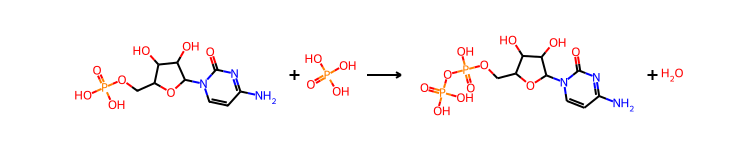

In [2]:
AllChem.ReactionFromSmarts('Nc1ccn(C2OC(COP(=O)(O)O)C(O)C2O)c(=O)n1.O=P(O)(O)O>>Nc1ccn(C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)c(=O)n1.O', useSmiles=True)


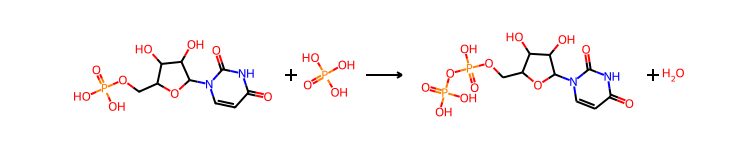

In [4]:
AllChem.ReactionFromSmarts('O=c1ccn(C2OC(COP(=O)(O)O)C(O)C2O)c(=O)[nH]1.O=P(O)(O)O>>O=c1ccn(C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)c(=O)[nH]1.O', useSmiles=True)